<a href="https://colab.research.google.com/github/Pankajace/EDA_CAPSTONE1/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading our csv file
df = pd.read_csv("/content/drive/MyDrive/Global Terrorism Data (2).csv", encoding= "ISO-8859-1",low_memory=False)

In [ ]:
# To display all the columns .
df
pd.pandas.set_option('display.max_columns', None)

In [ ]:
#Let's have some info about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [ ]:
# checking top 5 rows of our dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.45679,-69.95116,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.37189,-99.08662,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.47860,120.59974,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.76273,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN

In [ ]:
# Let's have important column only
df = df[['iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude','provstate','summary','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','motive','nkill']]

In [ ]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,provstate,summary,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,motive,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.45679,-69.95116,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.37189,-99.08662,Federal,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.47860,120.59974,Tarlac,NaN,Assassination,Journalists & Media,Unknown,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.99749,23.76273,Attica,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.58041,130.39636,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
#Giving our columns a suitable name
df.rename(columns ={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','provstate':'State','summary':'Summary','attacktype1_txt':'Attack','targtype1_txt':'Target','gname':'Terrorist_Group','weaptype1_txt':'Weapon','motive':'Motive','nkill': "No. of Deaths"},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,State,Summary,Attack,Target,Terrorist_Group,Weapon,Motive,No. of Deaths
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.45679,-69.95116,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.37189,-99.08662,Federal,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.47860,120.59974,Tarlac,NaN,Assassination,Journalists & Media,Unknown,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.99749,23.76273,Attica,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.58041,130.39636,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
#Now let's have a look at null values present in our dataset
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
City                  434
Latitude             4556
Longitude            4557
State                 421
Summary             66129
Attack                  0
Target                  0
Terrorist_Group         0
Weapon                  0
Motive             131130
No. of Deaths       10313
dtype: int64

In [ ]:
# Since no additional information is there therfore replacing null values with 0 .
df.fillna(0,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   City             181691 non-null  object 
 6   Latitude         181691 non-null  float64
 7   Longitude        181691 non-null  float64
 8   State            181691 non-null  object 
 9   Summary          181691 non-null  object 
 10  Attack           181691 non-null  object 
 11  Target           181691 non-null  object 
 12  Terrorist_Group  181691 non-null  object 
 13  Weapon           181691 non-null  object 
 14  Motive           181691 non-null  object 
 15  No. of Deaths    181691 non-null  float64
dtypes: float64(3), int64(3), object(10)
me

In [ ]:
#Let's have a look at our datatypes
df.dtypes

Year                 int64
Month                int64
Day                  int64
Country             object
Region              object
City                object
Latitude           float64
Longitude          float64
State               object
Summary             object
Attack              object
Target              object
Terrorist_Group     object
Weapon              object
Motive              object
No. of Deaths      float64
dtype: object

In [ ]:
#changing datatype of our column since no. of deaths cannot be a float value.
df['No. of Deaths'].astype(int)

0         1
1         0
2         1
3         0
4         0
         ..
181686    1
181687    2
181688    0
181689    0
181690    0
Name: No. of Deaths, Length: 181691, dtype: int64

In [ ]:
# Fetching data of all the attacks happened between 1970 and 2017 
df1 = df.groupby('Year')['Summary'].count().reset_index()
df1.rename(columns ={'Summary':'No.of attacks'},inplace = True)
df1


,Year,No.of attacks
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


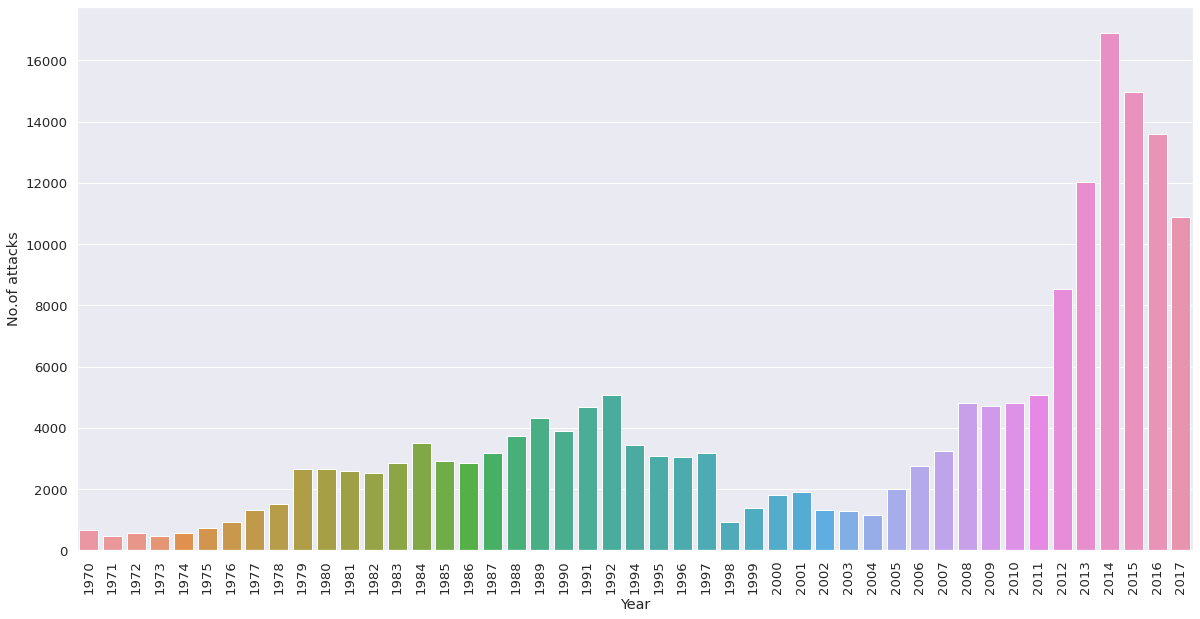

In [ ]:
# Plotting the No. of attacks vs year graph
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Year',y='No.of attacks',data=df1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Looking at Terrorist attacks country wise
df2 = df['Country'].value_counts().reset_index()
df2.columns= ['Countries', 'Total no. of Terrorist attacks']
df2 = df2.head(10)
df2


,Countries,Total no. of Terrorist attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


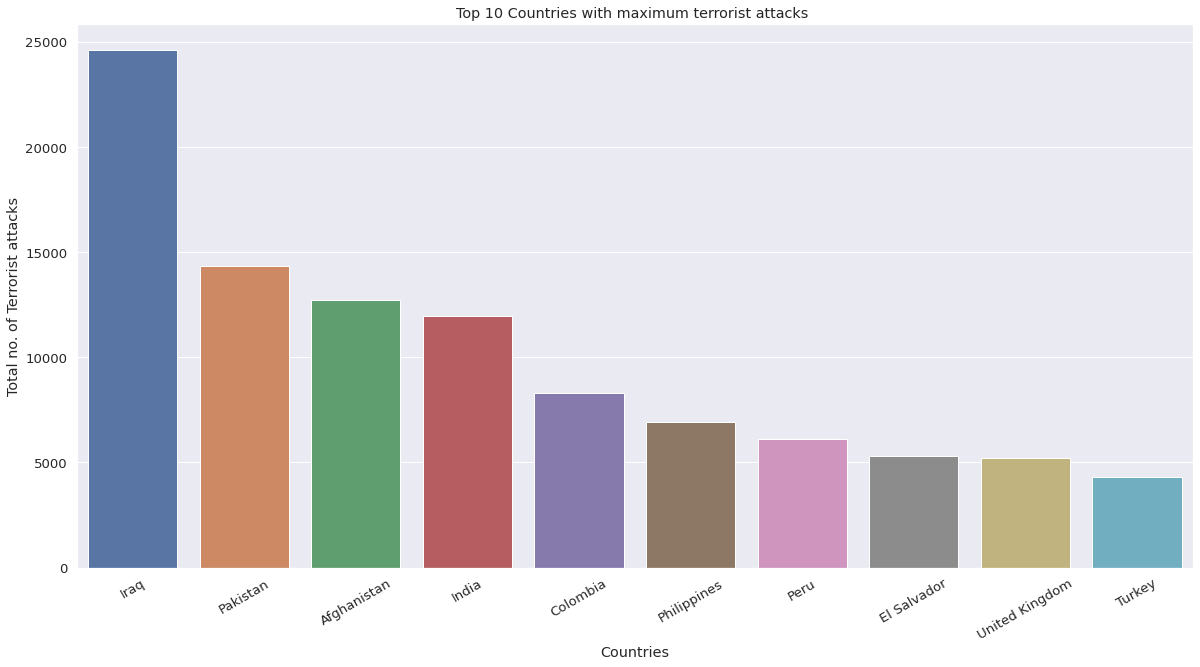

In [ ]:
# Plotting top 10 countries that have suffered most against terrorism
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Countries',y='Total no. of Terrorist attacks',data=df2)
plt.xticks(rotation =30)
plt.title("Top 10 Countries with maximum terrorist attacks ")
plt.show()

In [ ]:
# Taking a look into the continents which are most affected by the terrorism
df3 = df['Region'].to_frame().value_counts().reset_index()
df3.columns = ['Sub-Continents','No. of Attacks']
df3

,Sub-Continents,No. of Attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


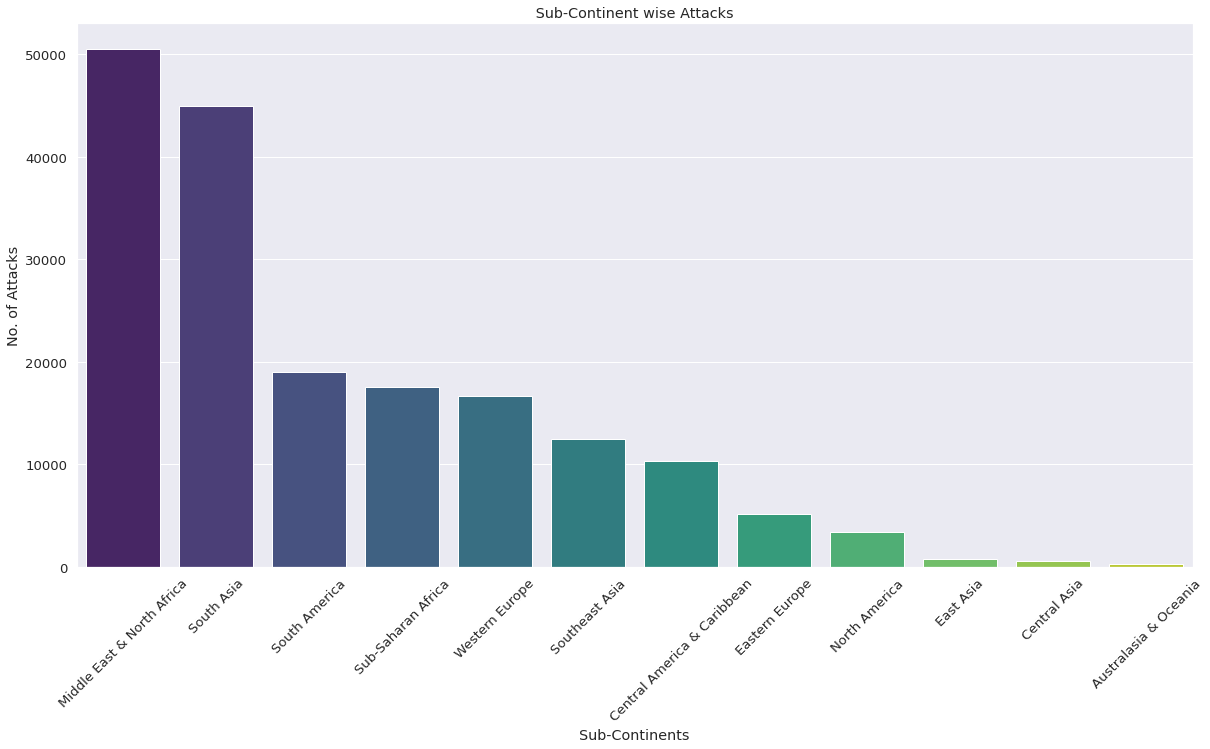

In [ ]:
# plotting Sub-Continent wise attacks
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Sub-Continents',y='No. of Attacks',data=df3,palette="viridis")
plt.xticks(rotation =45)
plt.title(" Sub-Continent wise Attacks ")
plt.show()

In [ ]:
# Let's find out the Terrorist groups involved in most terrrorist activities across the years
df5 = df['Terrorist_Group'].value_counts().to_frame().drop('Unknown').reset_index()[:15]
df5.rename(columns={'index':'Terrorist_Group','Terrorist_Group':'No. of Attacks Terrorist_Group involved'},inplace = True)
df5


,Terrorist_Group,No. of Attacks Terrorist_Group involved
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


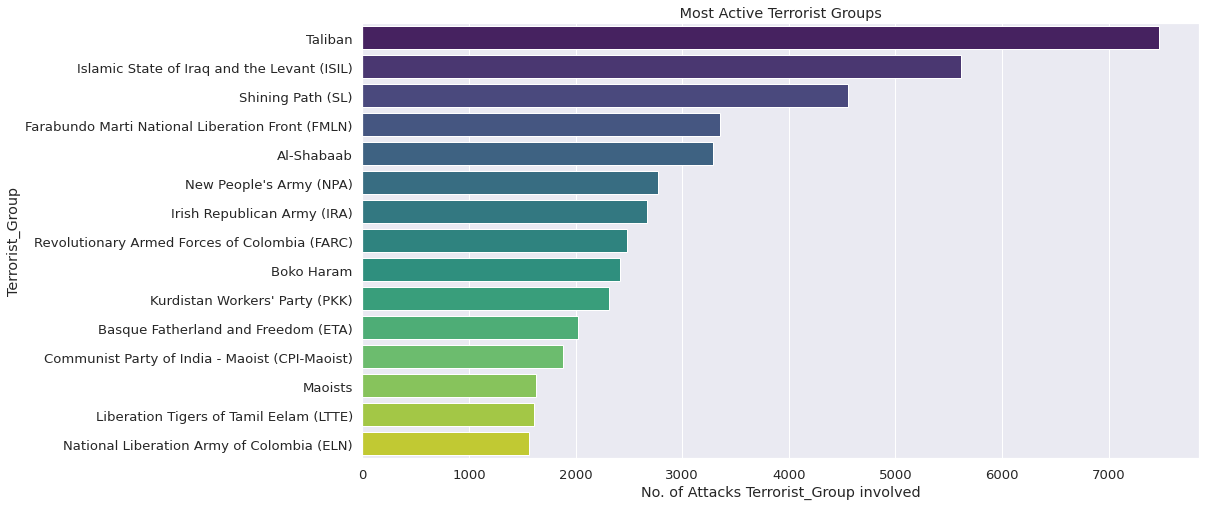

In [ ]:
# Plotting most Active Terrorist Groups
sns.set(font_scale=1.2)
plt.subplots(figsize=(15,8))
sns.barplot(x='No. of Attacks Terrorist_Group involved',y='Terrorist_Group',data=df5,palette="viridis")
plt.title(" Most Active Terrorist Groups ")
plt.show()

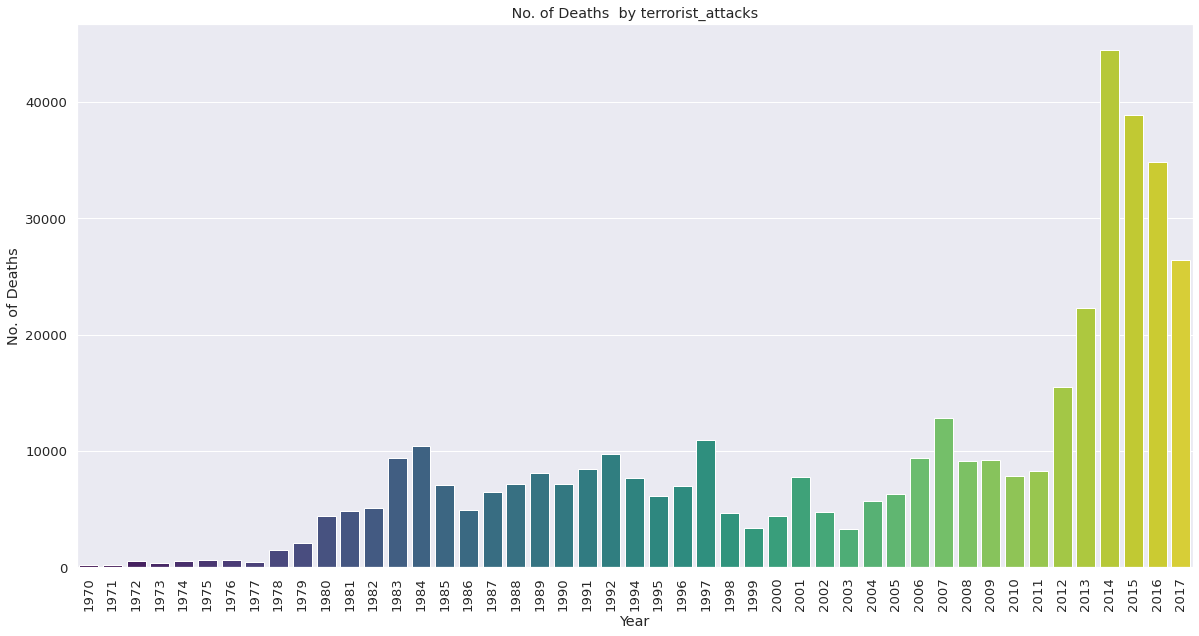

In [ ]:
# Visualing the Death Rates over the year by Terrorism
df4 = df.groupby('Year')['No. of Deaths'].sum().to_frame().reset_index()
df4.columns = ['Year', 'No. of Deaths']
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Year',y='No. of Deaths',data=df4,palette="viridis")
plt.xticks(rotation =90)
plt.title(" No. of Deaths  by terrorist_attacks ")
plt.show()

In [ ]:
# Now Let's have a look at the different weapons used for terrorist activities
df6 = df['Weapon'].value_counts().head(7).drop("Unknown").to_frame().reset_index()
df6.columns = ['Attack Type', 'Total Attacks']
df6

,Attack Type,Total Attacks
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141


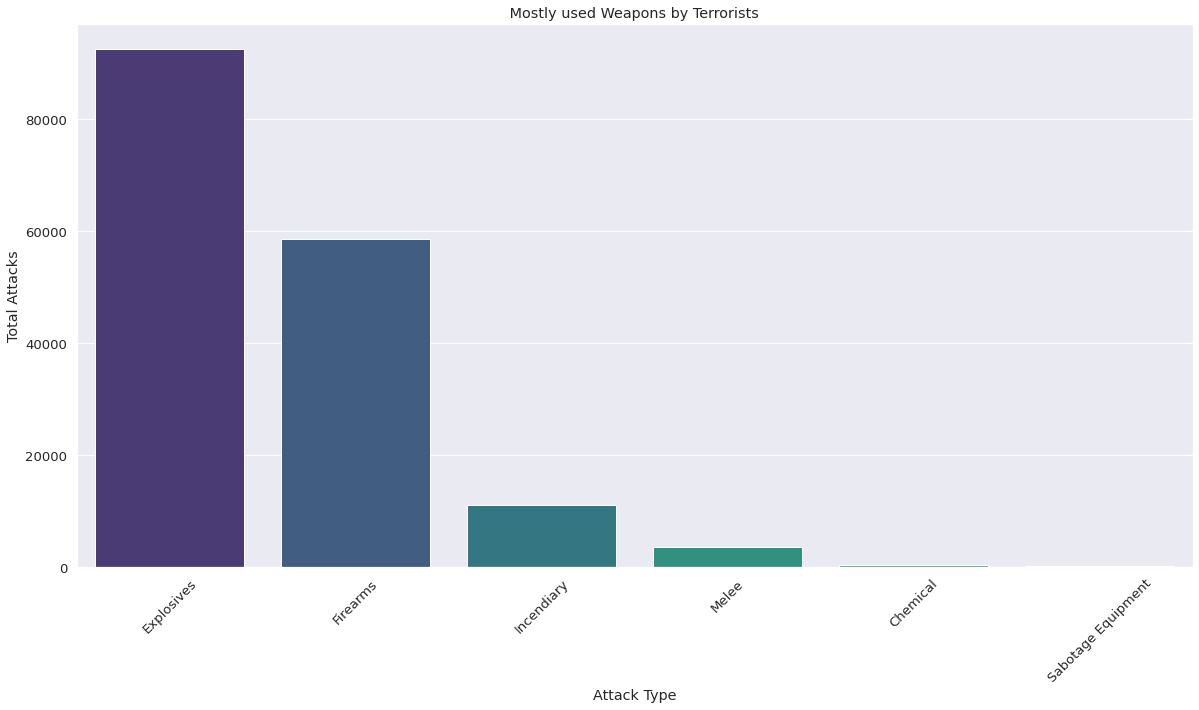

In [ ]:
# plotting different type of attacks
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Attack Type',y='Total Attacks',data=df6,palette="viridis")
plt.title(" Mostly used Weapons by Terrorists ")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'Latitude',
       'Longitude', 'State', 'Summary', 'Attack', 'Target', 'Terrorist_Group',
       'Weapon', 'Motive', 'No. of Deaths'],
      dtype='object')

In [ ]:
df7 = df['Target'].value_counts().reset_index()
df7.columns = ['Common Target Type','No. of Times Targeted']

In [ ]:
df7


,Common Target Type,No. of Times Targeted
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


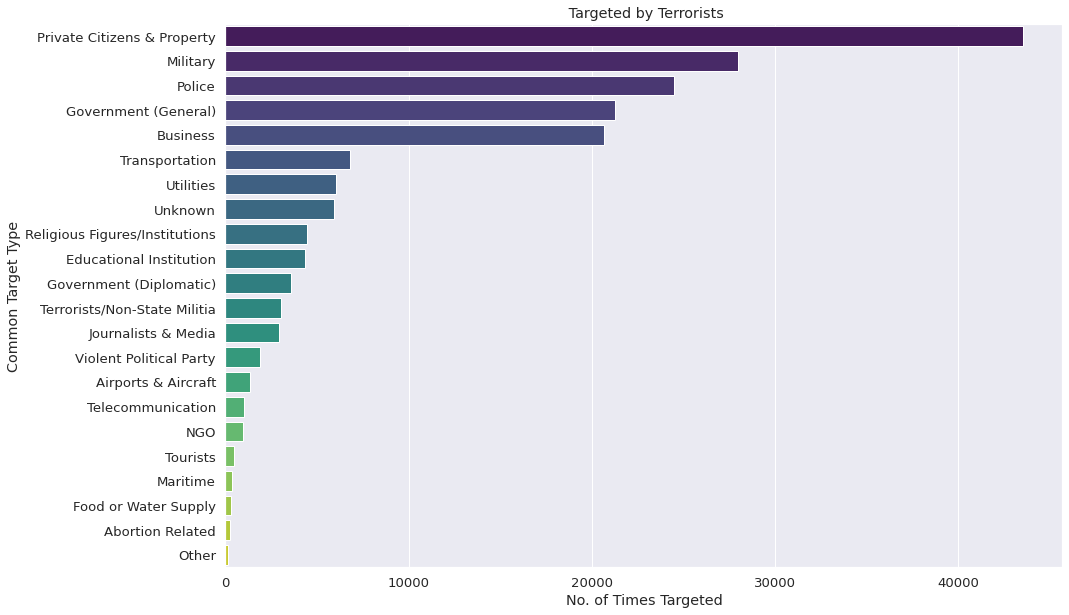

In [ ]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(15,10))
sns.barplot(x='No. of Times Targeted',y='Common Target Type',data=df7,palette="viridis")
plt.title(" Targeted by Terrorists")
plt.show()

In [ ]:
df['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [ ]:
# Analyzing Terrorism Dataset for our country India

In [ ]:
df8 = df[df['Country']=='India']

In [ ]:
df8

,Year,Month,Day,Country,Region,City,Latitude,Longitude,State,Summary,Attack,Target,Terrorist_Group,Weapon,Motive,No. of Deaths
1186,1972,2,22,India,South Asia,New Delhi,28.58584,77.15334,Delhi,0,Hijacking,Airports & Aircraft,Palestinians,Explosives,0,0.0
2764,1975,1,2,India,South Asia,Samastipur,25.86304,85.78100,Bihar,"1/2/1975: The Indian Railway Minister, Lalit N...",Bombing/Explosion,Government (General),Ananda Marga,Explosives,Unknown,4.0
3857,1976,5,26,India,South Asia,New Delhi,28.58584,77.15334,Delhi,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0,0.0
5327,1977,9,28,India,South Asia,Bombay,19.07598,72.87766,Maharashtra,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0,0.0
7337,1979,1,13,India,South Asia,Unknown,26.20061,92.93757,Assam,0,Armed Assault,Police,Naga People,Firearms,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,30,India,South Asia,Koothuparamba,11.83190,75.56543,Kerala,12/30/2017: Assailants threw an explosive devi...,Bombing/Explosion,Police,Unknown,Explosives,"The specific motive is unknown; however, sourc...",0.0
181665,2017,12,30,India,South Asia,Toylanka,18.80273,81.49767,Chhattisgarh,12/30/2017: Assailants set fire to seven vehic...,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),Firearms,"The specific motive is unknown; however, sourc...",0.0
181672,2017,12,31,India,South Asia,Lethapora,33.96653,74.96423,Jammu and Kashmir,12/31/2017: Assailants armed with grenades and...,Armed Assault,Police,Jaish-e-Mohammad (JeM),Explosives,"The specific motive is unknown; however, sourc...",8.0
181684,2017,12,31,India,South Asia,Hungrum,25.18016,93.01579,Assam,12/31/2017: Assailants abducted Prafulla Phuka...,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Firearms,0,0.0


In [ ]:
# Let's have a look how our lovely india has suffered against terrorism over these years
# No. of Terrorist attacks in india
df9 = df8['Year'].value_counts().to_frame().reset_index()
df9.columns = ['Year', 'No. of Attacks']


In [ ]:
df9

,Year,No. of Attacks
0,2016,1025
1,2017,966
2,2015,884
3,2014,860
4,2013,694
5,2009,672
6,2010,663
7,2011,645
8,2012,611
9,2008,534


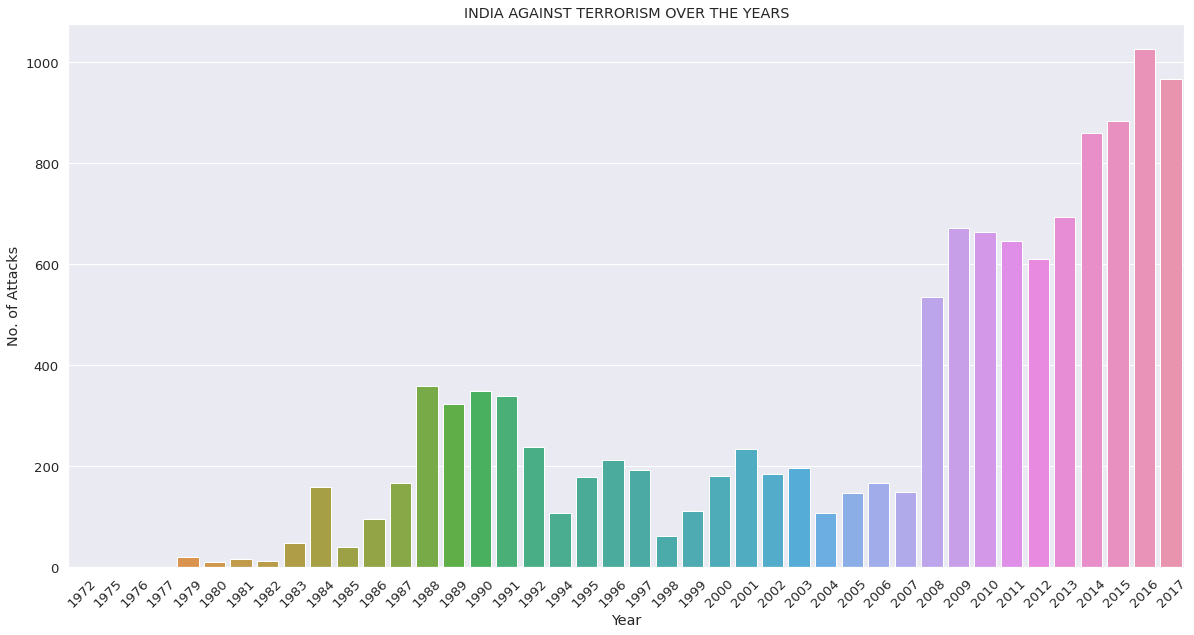

In [ ]:
# plotting no. of Terrorist attacks in india
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Year',y='No. of Attacks',data=df9)
plt.title("INDIA AGAINST TERRORISM OVER THE YEARS")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Attacks on Indian cities
df10 = df8['City'].value_counts().drop('Unknown').head(10).reset_index()
df10.columns = ['City', 'No. of Attacks']
df10

,City,No. of Attacks
0,Srinagar,658
1,Imphal,426
2,New Delhi,157
3,Amritsar,138
4,Sopore,102
5,Ludhiana,77
6,Guwahati,77
7,Anantnag,76
8,Jammu,57
9,Latehar district,55


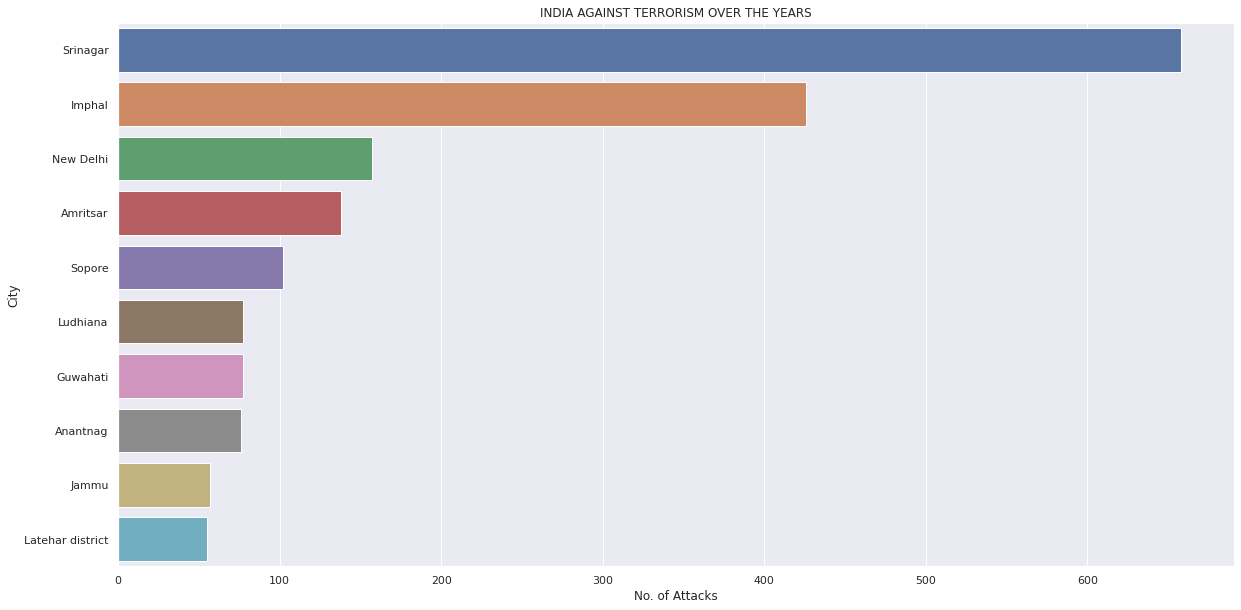

In [ ]:
# PLotting most attacked city of india
sns.set(font_scale=1)
plt.subplots(figsize=(20,10))
sns.barplot(x='No. of Attacks',y='City',data=df10)
plt.title("INDIA AGAINST TERRORISM OVER THE YEARS")
plt.show()

In [ ]:
# Terrorist Groups those have carried out terrorist activites over the years in india.
df11 = df8.groupby('Terrorist_Group')['Year'].count().drop('Unknown').sort_values(ascending = False).reset_index()

In [ ]:
df11.columns = ['Terrorist_ Group_ Name', 'No. of times Attacked']
df11 = df11.head(10)


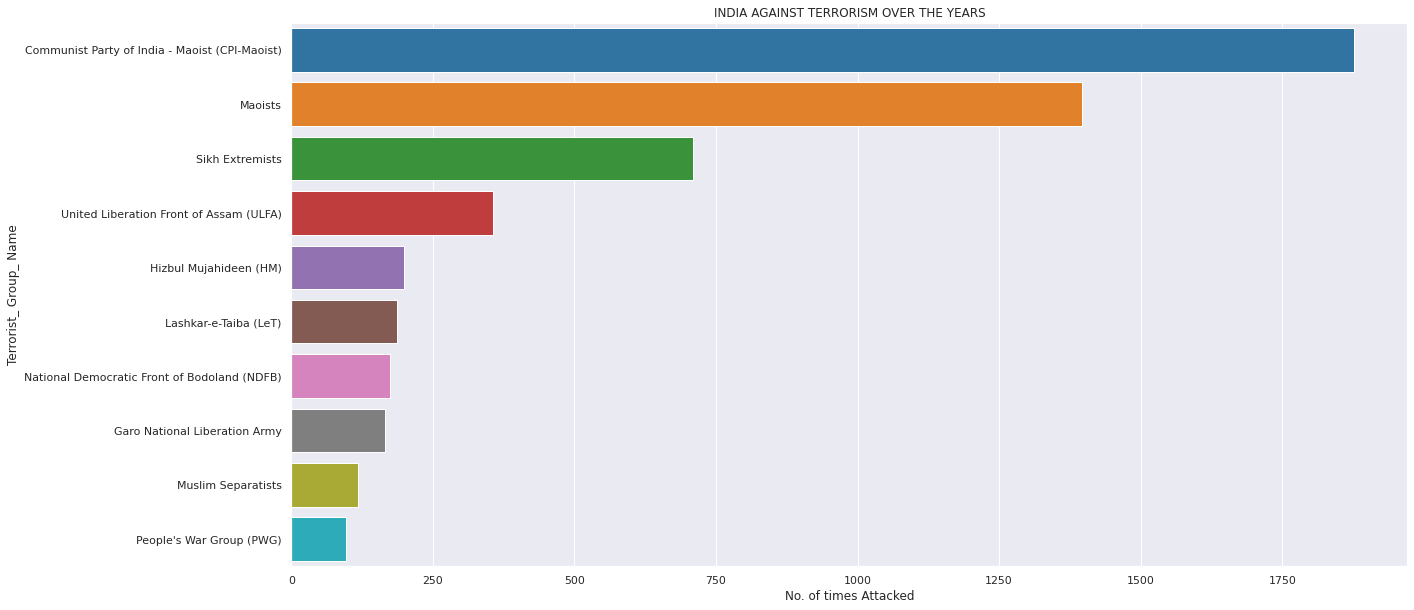

In [ ]:
#plotting terrorist groups attacked india
sns.set(font_scale=1)
plt.subplots(figsize=(20,10))
sns.barplot(x='No. of times Attacked',y='Terrorist_ Group_ Name',data=df11,palette ='tab10' )
plt.title("INDIA AGAINST TERRORISM OVER THE YEARS")
plt.show()

In [ ]:
# Fetching data for No. of Deaths in India caused due to terrorist attacks.
df8['No. of Deaths'].astype('int')
df12 = df8.groupby('Year')['No. of Deaths'].sum().reset_index()

In [ ]:
df12.columns = ['Year','Total No. of Deaths']
df12

,Year,Total No. of Deaths
0,1972,0.0
1,1975,4.0
2,1976,0.0
3,1977,0.0
4,1979,31.0
5,1980,17.0
6,1981,24.0
7,1982,64.0
8,1983,59.0
9,1984,195.0


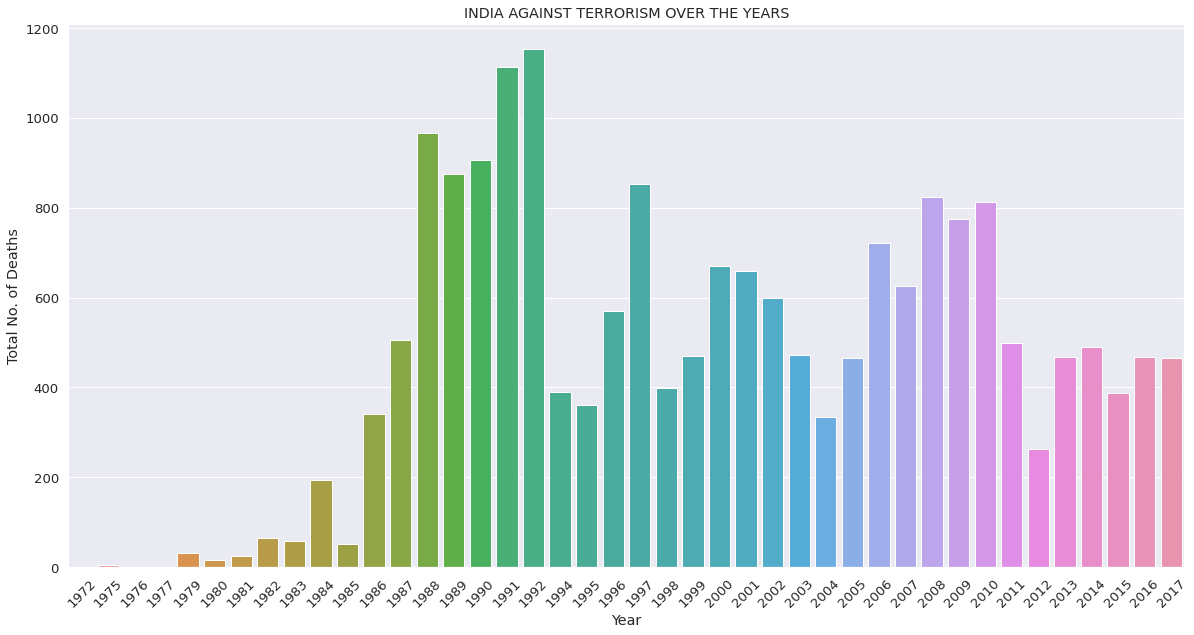

In [ ]:
#plotting No. of Deaths happened in india due to terrorist attacks
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='Year',y='Total No. of Deaths',data=df12)
plt.title("INDIA AGAINST TERRORISM OVER THE YEARS")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Weapons used against india to carry out terrorist attacks
df13 = df8['Weapon'].value_counts().to_frame().drop('Unknown').reset_index().head()
df13

,index,Weapon
0,Explosives,5030
1,Firearms,4530
2,Incendiary,930
3,Melee,502
4,Sabotage Equipment,32


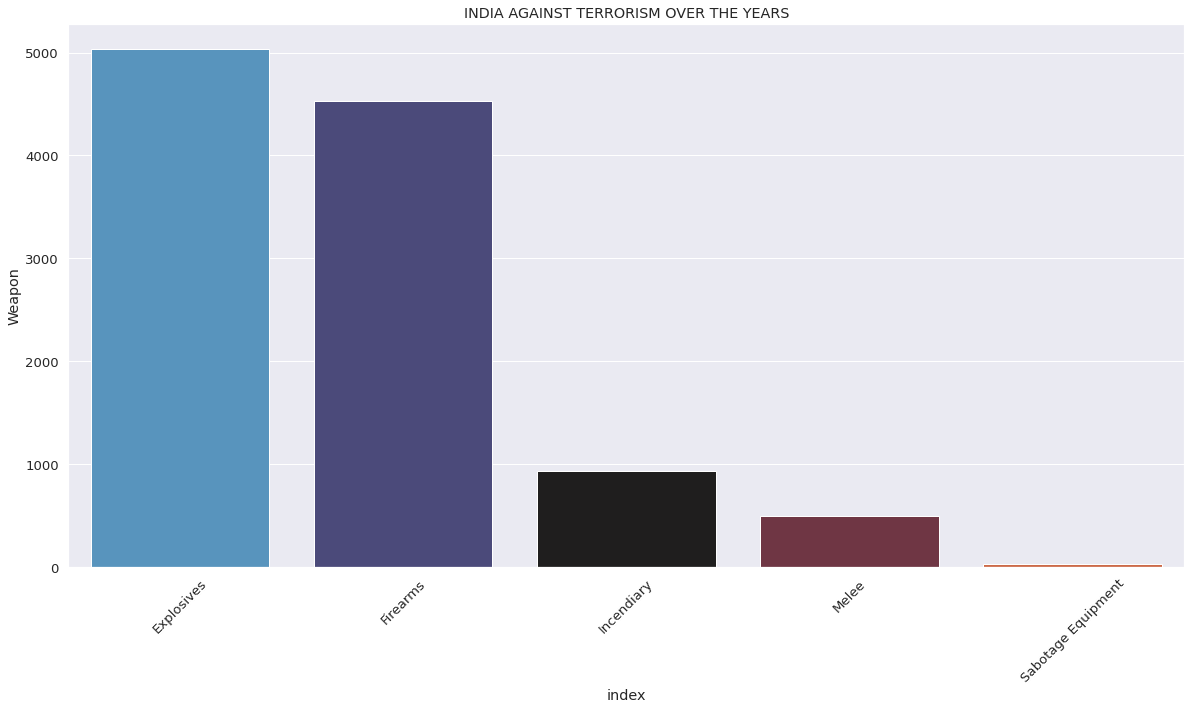

In [ ]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,10))
sns.barplot(x='index', y='Weapon',data = df13,palette="icefire")
plt.title("INDIA AGAINST TERRORISM OVER THE YEARS")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'Latitude',
       'Longitude', 'State', 'Summary', 'Attack', 'Target', 'Terrorist_Group',
       'Weapon', 'Motive', 'No. of Deaths'],
      dtype='object')

In [ ]:
#primary targets in india
df14 = df8['Target'].value_counts().drop('Unknown').head(10).reset_index()
df14.columns = ['Target', 'No. of times targeted']

In [ ]:
df14

,Target,No. of times targeted
0,Private Citizens & Property,3144
1,Police,2299
2,Government (General),1727
3,Business,1131
4,Military,916
5,Transportation,831
6,Educational Institution,297
7,Violent Political Party,234
8,Religious Figures/Institutions,214
9,Terrorists/Non-State Militia,143


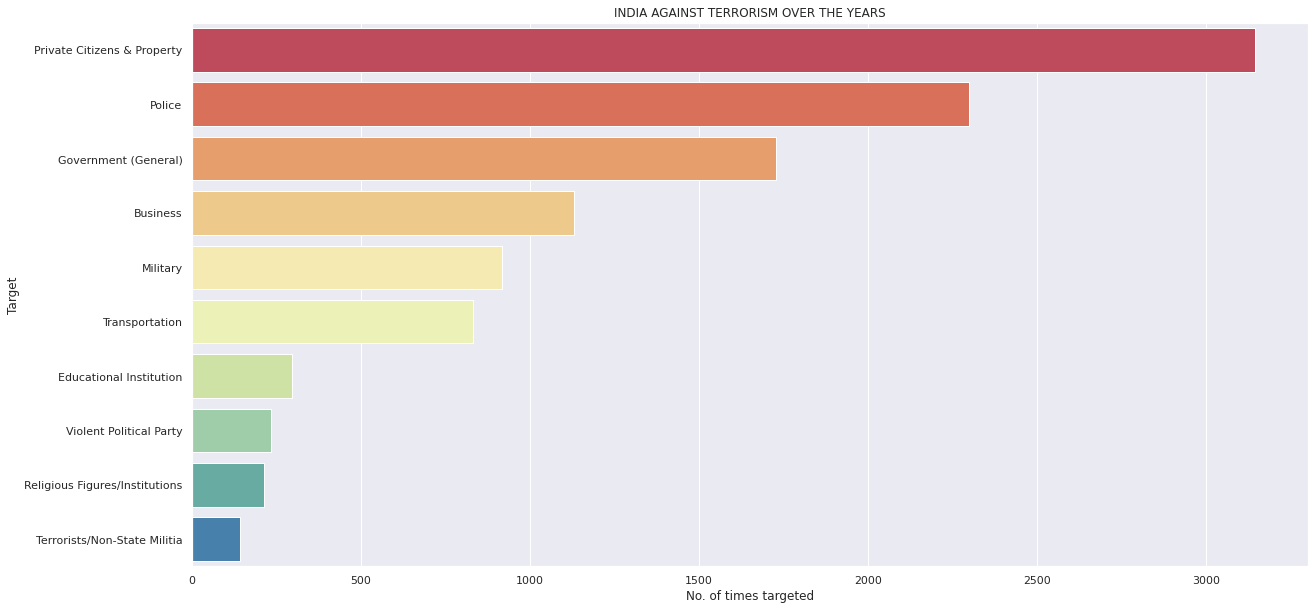

In [ ]:
#plottting target vs  No._of_times_targeted
sns.set(font_scale=1)
plt.subplots(figsize=(20,10))
sns.barplot(x='No. of times targeted',y='Target',data=df14,palette ='Spectral' )
plt.title("INDIA AGAINST TERRORISM OVER THE YEARS")
plt.show()